In [0]:
#@title <b><font color="red">▶</font><font color="black"> run this cell to prepare supplementary materials for the lesson</font></b>

!rm -rf harbour-space-text-mining-course
!git clone https://github.com/horoshenkih/harbour-space-text-mining-course.git
import sys
sys.path.append('harbour-space-text-mining-course')

from tmcourse.utils import (
    calendar_table,
    visualize_term_counter,
    enable_mathjax_in_cell,
)
from tmcourse.ipyquiz import Quiz, Function
from tmcourse.quiz import (
    quiz_count_tokens,
    quiz_count_lemmas,
    quiz_ner,
    quiz_tfidf,
    quiz_vectorizer_shape,
    quiz_vector_distance,
)

from collections import Counter
from math import exp
from tabulate import tabulate
from tqdm.notebook import tqdm
from IPython.display import HTML, display

Cloning into 'harbour-space-text-mining-course'...
remote: Enumerating objects: 117, done.
remote: Counting objects: 100% (117/117), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 424 (delta 83), reused 77 (delta 44), pack-reused 307
Receiving objects: 100% (424/424), 40.03 MiB | 20.86 MiB/s, done.
Resolving deltas: 100% (266/266), done.


<!--@slideshow slide-->
<h1><center>Introduction. Tools for text analysis. TF-IDF.</center></h1>

# Overview of the course

<!--@slideshow slide-->
## The team

### Your teacher
- Sergey Khoroshenkikh
- Senior software engineer at [Yandex](https://yandex.com/company/)
- ~6 years of experience in data analysis and engineering
- Taught Machine Learning at Harbour.Space in 2019: [DS210](https://in.harbour.space/data-science/machine-learning-sergey-khoroshenkikh/)
- <img src="https://www.freepnglogos.com/uploads/logo-gmail-png/logo-gmail-png-image-gmail-logo-gta-wiki-the-grand-theft-auto-4.png" alt="email" width="15"> horoshenkih91@gmail.com, <img src="https://upload.wikimedia.org/wikipedia/commons/8/82/Telegram_logo.svg" alt="tg" width="15"> @khoroshenkikh

### Teaching assistant
- Catalina Sagan
- <img src="https://www.freepnglogos.com/uploads/logo-gmail-png/logo-gmail-png-image-gmail-logo-gta-wiki-the-grand-theft-auto-4.png" alt="email" width="15"> csagan.cs@gmail.com

<!--@slideshow slide-->
## Learning objectives
1. Learn the main concepts
  - TF-IDF, language models, classification, topic modeling, distributional semantics, neural networks, ...
2. Understand the algorithms
  - n-gram language models, linear classifiers, LDA, word2vec, backpropagation, RNN, LSTM, ...
3. Practice the tools **on real datasets**
  - spaCy, sklearn, gensim, fasttext, pytorch, ...

<!--@slideshow slide-->

## Core ideas of the course
1. Remote-first
  - Chunked content
  - Ungraded quizzes during the lecture
  - Coding sessions in Zoom breakout rooms
2. Hands-on
  - Coding sessions
  - Final projects
3. Code-first
  - The most important content is written in Python code (slides are somewhat optional)
  - Math is supported by code


<!--@slideshow slide-->
## Grading policy
- 30 points: graded quiz assignments in Google Classroom (**class code: wo7vv5r**)
- 70+ points: final project
  - Apply learned Text Mining techniques on real dataset
  - Report your results at the end of the course
  - **Receive additional points for making a small MVP**
- There are many ways to get 100 points
  - Apply more Text Mining techniques
  - Create an MVP

See more details in our Google Classroom.

<!--@slideshow slide-->
## Technical details
- The course is taught in Google Colab
- Colab notebooks are the primary source of information
- ⬅️ Table of contents is on the left
- All the slides are created from Colab notebooks
- Ungraded quizzes in Colab notebooks:
  - Always run the first cell in the notebook to make it work
  - I implemented the Python library for quizzes on my own, so bugs are possible
- You can copy Colab notebooks and run your copy
- You can modify your copy
  - Notes: `> ...`
  > The example of a note
  - $\LaTeX$ equations: `$...$` or `$$...$$`
  $$E=mc^2$$
- A short overview of Colab features: [link](https://colab.research.google.com/notebooks/basic_features_overview.ipynb)

<!--@slideshow slide-->
## Remote learning details
- You are muted by default. To ask a question
  - Press the "raise hand" button in Zoom
  - Or write your question to the Zoom chat
- Ungraded quizzes
  - After you've finished the quiz, press the **"raise hand"**
  - If you have a question, write it to the Zoom chat
- Coding sessions
  - You work in individual breakout rooms
  - Turn on screen sharing
  - To ask a question, press the "raise hand" button

<!--slideshow slide-->
# Plan for today
1. Look at the collection of Donald Trump's tweets
2. Get familiar with `spacy`: Python library for text analysis
3. Learn about tokenization, lemmatization and NLP pipeline in general
4. Coding session 1: work with `spacy`
5. Learn about TF-IDF
6. "Word of a day": find specific words in tweets
7. Learn how co compute TF-IDF in `sklearn`
8. Find similar texts using TF-IDF 
9. Coding session 2: work with `sklearn`

<!--@slideshow slide-->
# Dataset: TrumpTwitterArchive.com

In this lesson, we will study [Trump's tweets](http://trumptwitterarchive.com/archive) stored in a JSON file in [the course repo on GitHub](https://github.com/horoshenkih/harbour-space-text-mining-course).

> You can also store the data for your final projects on GitHub


In [0]:
#@slideshow fragment
# NB! Run the first cell of the notebook to checkout the repo
import json
with open("harbour-space-text-mining-course/datasets/trump_twitter_archive/tweets.json") as f:
    tweets = json.load(f)

<!--@slideshow slide-->
Tweets are stored in a list of dictionaries

In [0]:
#@slideshow fragment
from pprint import pprint
print(f"type: {type(tweets)}")
pprint(tweets[0])
print(f"Text: {tweets[0]['text']}")
print(f"Created at: '{tweets[0]['created_at']}'")

type: <class 'list'>
{'created_at': 'Fri May 08 23:01:21 +0000 2020',
 'favorite_count': 0,
 'id_str': '1258894788893577216',
 'is_retweet': True,
 'retweet_count': 9442,
 'source': 'Twitter for iPhone',
 'text': 'RT @FLOTUS: In honor of #VEDay75, @POTUS and I joined some of our '
         'nations heros at the World War II Memorial to lay a wreath in '
         'commemorati…'}
Text: RT @FLOTUS: In honor of #VEDay75, @POTUS and I joined some of our nations heros at the World War II Memorial to lay a wreath in commemorati…
Created at: 'Fri May 08 23:01:21 +0000 2020'


<!--@slideshow slide-->
## Preliminary analysis
Let's look at the meaningful characteristics of the dataset

Number of tweets: 48040
Number of unique characters: 752
Average tweet length: 126.36738134887594


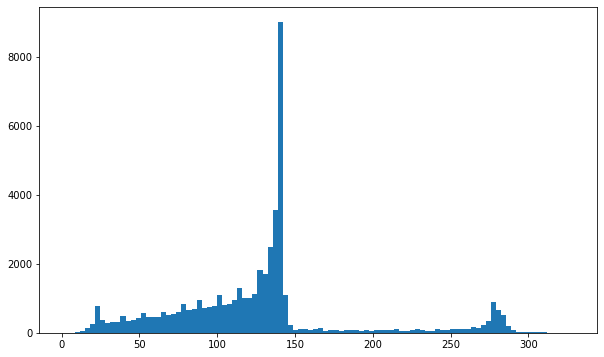

In [0]:
#@slideshow slide
print(f"Number of tweets: {len(tweets)}")
# compute the number of unique characters
char_set = set()
for t in tweets:
    char_set.update(list(t['text']))
print(f"Number of unique characters: {len(char_set)}")
# compute the distribution of text sizes
tweet_len_characters = [len(t['text']) for t in tweets]
avg_text_len = sum(tweet_len_characters) / len(tweet_len_characters)
print(f"Average tweet length: {avg_text_len}")
import matplotlib.pyplot as plt
# print the distribution of tweet sizes
plt.figure(figsize=(10, 6))
plt.hist(tweet_len_characters, bins=100)
plt.show()

<!--@slideshow slide-->
# Tokenization

How do we read texts?

- Technically speaking, a text is a sequence of *characters*.
- But we don't read texts character-by-character.
- We perceive the text as the sequence of words, phrases, punctuation and other *meaningful* pieces.


<!--@slideshow fragment-->
**Definition**: *token* is a meaningful substring (for example, a word or a punctuation sign).

The exact definition depends on your application!
- You may need to keep emojis for *sentiment analysis* and ignore them for *topic modeling*.
- You may remove punctuation for *text classification* and keep it for *language modeling*.

For example, the substring `":-)"` may be a single token, three tokens or it may be ignored (0 tokens).


<!--@slideshow slide-->
The easiest to tokenize the text is to split it by whitespace

> This is what the method `.split()` does.


In [0]:
#@slideshow fragment
text = tweets[222]["text"]
print("Text:")
pprint(text)
print("Tokens:")
pprint(text.split(), compact=True)

Text:
("RT @mitchellvii: DEMOCRATS DIDN'T EXPECT THIS - Washington Post Poll: "
 'Hispanics Are the Strongest Opponents of Immigration https://t.co/jqu…')
Tokens:
['RT', '@mitchellvii:', 'DEMOCRATS', "DIDN'T", 'EXPECT', 'THIS', '-',
 'Washington', 'Post', 'Poll:', 'Hispanics', 'Are', 'the', 'Strongest',
 'Opponents', 'of', 'Immigration', 'https://t.co/jqu…']


<!--@slideshow slide-->
We see that dealing with punctuation is tricky.
> We need `['Poll', ':']` instead of `'Poll:'`

But we cannot split by punctuation.

> We don't need to split `"DIDN'T"` into `['DIDN', 'T']`

<!--@slideshow slide-->
## spaCy

It's time to get familiar with `spaCy` - a Python library for Natural Language Processing (NLP).

In [0]:
from pprint import pprint

In [0]:
#@slideshow slide
# text to be tokenized
print("Text:")
pprint(tweets[222]["text"])

from spacy.lang.en import English

# create text analyzer that includes rules of tokenization
# rules are language-specific, so we load the rules for English
nlp = English()

# spaCy has functional API: you just call nlp(text)
analyzed_text = nlp(tweets[222]["text"])

# the resulting object (`analyzed_text`) is iterable, and tokens can be extracted by iteration
print("Tokens:")
pprint([token.text for token in analyzed_text], compact=True)
print([token.text for token in analyzed_text])

Text:
("RT @mitchellvii: DEMOCRATS DIDN'T EXPECT THIS - Washington Post Poll: "
 'Hispanics Are the Strongest Opponents of Immigration https://t.co/jqu…')
Tokens:
['RT', '@mitchellvii', ':', 'DEMOCRATS', "DIDN'T", 'EXPECT', 'THIS', '-',
 'Washington', 'Post', 'Poll', ':', 'Hispanics', 'Are', 'the', 'Strongest',
 'Opponents', 'of', 'Immigration', 'https://t.co/jqu', '…']
['RT', '@mitchellvii', ':', 'DEMOCRATS', "DIDN'T", 'EXPECT', 'THIS', '-', 'Washington', 'Post', 'Poll', ':', 'Hispanics', 'Are', 'the', 'Strongest', 'Opponents', 'of', 'Immigration', 'https://t.co/jqu', '…']


<!--@slideshow slide-->
Let's find the most frequent tokens

In [0]:
#@slideshow fragment
from spacy.lang.en import English

nlp = English()
token_counter = Counter()

for tweet in tweets[:10000]:
    doc = nlp(tweet["text"])
    for token in doc:
        token_counter[token.text] += 1
pprint(token_counter.most_common()[:20], compact=True)

[(',', 10662), ('the', 9999), ('.', 8825), ('to', 5888), (':', 5752),
 ('!', 5201), ('and', 4809), ('RT', 4677), ('of', 4295), ('a', 3639),
 ('…', 3521), ('is', 3285), ('in', 3080), ('for', 2464), ('that', 1954),
 ('I', 1917), ('on', 1822), ('are', 1740), ('The', 1689), ('with', 1560)]


<!--@slideshow fragment-->
- Note that tokens "The" and "the" are treated as different words, but have the same meaning.
- "is" and "are" are two forms of the same verb.

<!--@slideshow slide-->
## Colab quiz 1
This is the first in-class code quiz in the course.
Its purpose is to check your understanding as the class progresses. 
**All Colab quizzes are ungraded.**

1. Make sure to run the first cell of this Colab notebook. It imports all the necessary libraries to run the quiz.
2. Your task is to implement a function according to the problem statement. In the example below, the problem statement is
  > Compute the number of tokens in an input string using spaCy.

  The function you need to implement is called `solution()`.
  The signature (i.e. the input and output types) and the first line are already implemented; your task is to complete the implementation.
3. `check_solution()` is the function that prints out the problem statement and checks your solution. You can see the results of some (but not all) tests. In this quiz, there are 5 tests but only 2 are shown to you.
4. After you've finished, press the "Raise hand" button in Zoom. If you have a question, send it to the Zoom chat or ask me in the chat to unmute you.

In [0]:
def solution(s: str) -> int:
    from spacy.lang.en import English
    nlp = English() # plain English tokenization
    # YOUR CODE HERE
    doc = nlp(s) # store document as spacy tokens - sentence saved as token list
    print(type(doc))
    token_counter = Counter()
    for tokens in doc:
      token_counter[tokens] += 1 # get list of token counter tuples
    print(token_counter.most_common(10))
    return len(nlp(s)) # length of tokens in each document


# the function `quiz_count_tokens()` returns a function that checks your solituon
check_solution = quiz_count_tokens()
check_solution(solution)

<class 'spacy.tokens.doc.Doc'>
[(This, 1), (is, 1), (a, 1), (text, 1), (., 1)]
<class 'spacy.tokens.doc.Doc'>
[(Do, 1), (n't, 1), (reinvent, 1), (the, 1), (wheel, 1), (,, 1), (use, 1), (spaCy, 1), (., 1)]
<class 'spacy.tokens.doc.Doc'>
[(Easy, 1), (-, 1), (peasy, 1), (lemon, 1), (squeezy, 1)]
<class 'spacy.tokens.doc.Doc'>
[(Easy, 1), (-, 1), (peasy, 1), (lemon, 1), (squeezy, 1), (., 1)]
<class 'spacy.tokens.doc.Doc'>
[(Two, 1), (sentences, 1), (., 1), (With, 1), (exclamation, 1), (mark, 1), (!, 1)]


<!--@slideshow slide-->
# Lemmatization

It is often convenient to use only one form of a word
- "The", "the" $\rightarrow$ "the"
- "is", "are" $\rightarrow$ "be"



<!--@slideshow fragment-->
**Definition**: *lemma* is the canonical form of a word.
> For example, dictionaries contain lemmas instead of all possible word forms.

<!--@slideshow fragment-->

Let's see how to find lemmas in spaCy.

In [0]:
#@slideshow slide
import spacy
# note that we create `nlp` in a different way
# because we need to load dictionaries for lemmatization
nlp = spacy.load("en")

token_lemma_hash = []
for token in nlp("Don't mess with Donald Trump."):
    # `lemma_` attribute contains the text of the token's lemma
    lemma = token.lemma_
    # `lemma` (without underscore) contains the hashed lemma (the internal spaCy prepresentation)
    hashed_lemma = token.lemma
    token_lemma_hash.append((token, lemma, hashed_lemma))

print(tabulate(token_lemma_hash, headers=["Token", "Lemma", "Hashed lemma"]))

Token    Lemma            Hashed lemma
-------  -------  --------------------
Do       do        2158845516055552166
n't      not        447765159362469301
mess     mess      1045978126549908185
with     with     12510949447758279278
Donald   Donald   16889399016836222064
Trump    Trump     1134333841961332695
.        .        12646065887601541794


<!--@slideshow fragment-->
Note the translations 
- `["Do", "n't"]` $\rightarrow$ `["do", not"]`
- `["Donald", "Trump"]` $\rightarrow$ `["Donald", "Trump"]` (not `["donald", "trump"]`)

<!--@slideshow slide-->
How does it work? Why `"Do"` $\rightarrow$ `"do"` and not `"Trump"` $\rightarrow$ `"trump"`?


<!--@slideshow fragment-->
spaCy determines the lemma using not only spelling. It also predicts part of speech (POS) of the token.

> Part of speech is _predicted with some probability_, because it is impossible to infer it from spelling.


<!--@slideshow fragment-->
This process (predict part of speech) is called POS-tagging.

Let's see how to perform POS-tagging with spaCy.

In [0]:
#@slideshow slide
token_tag_description = []
for text in ("he had played a trump", "trump is the us president"):
  for token in nlp(text): # lemma nlp
        # `tag_` attribute contains the text of the token's predicted part-of-speech tag
        tag = token.tag_
        # `spacy.explain` makes tag_ human-readable
        tag_description = spacy.explain(tag)
        token_tag_description.append((token, tag, tag_description))
print(tabulate(token_tag_description, headers=("Token", "Tag", "Tag description")))

Token      Tag    Tag description
---------  -----  ---------------------------------
he         PRP    pronoun, personal
had        VBD    verb, past tense
played     VBN    verb, past participle
a          DT     determiner
trump      NN     noun, singular or mass
trump      NNP    noun, proper singular
is         VBZ    verb, 3rd person singular present
the        DT     determiner
us         NNP    noun, proper singular
president  NN     noun, singular or mass


<!--@slideshow slide-->
## Colab quiz 2

In [0]:
def solution(s: str) -> int:
    import spacy
    nlp = spacy.load("en")
    # YOUR CODE HERE
    doc = nlp(s)  # tokenize doc(sentence) as a spacy token list
    token_description = []
    for token in doc:
      lemma = token.lemma_  # convert token to lemma
      lemma_hash = token.lemma  # get lemma hash
      token_tag = token.tag_  # get POS tag
      token_tag_description = spacy.explain(token_tag)  # human readable tag
      token_description.append((token, lemma, lemma_hash, token_tag, token_tag_description))
    print(tabulate(token_description, headers=["Token", "Lemma", "Lemma Hash", "Tag", "Tag Description"]))
    return len({token.lemma_ for token in nlp(s)})  # get unique lemmas

check_solution = quiz_count_lemmas()
check_solution(solution)

<!--@slideshow slide-->
# NLP pipeline

`spaCy` extracts a lot of information from the text.

It is performed as a sequence of steps combined into so-called NLP pipeline.
> NLP = Natural Language Processing

![NLP pipeline](https://spacy.io/pipeline-7a14d4edd18f3edfee8f34393bff2992.svg)

Read more: https://spacy.io/usage/processing-pipelines

In [0]:
#@sldeshow slide
import spacy
nlp = spacy.load("en")
# `nlp` object has the attribute `pipeline`
nlp.pipeline

[('tagger', <spacy.pipeline.pipes.Tagger at 0x7f6aea54b748>),
 ('parser', <spacy.pipeline.pipes.DependencyParser at 0x7f6aeaccf888>),
 ('ner', <spacy.pipeline.pipes.EntityRecognizer at 0x7f6aeaccf8e8>)]

<!--@slideshow fragment-->
`tagger` performs POS-tagging.
Let's briefly look at `parser` and `ner`.

<!--@slideshow slide-->
## parser
The `parser` component extracts dependencies between words.

In [0]:
#@slideshow fragment
doc = nlp("This is a sentence.")

# display the relations using spacy.displacy.render
html = spacy.displacy.render(doc, style="dep")
display(HTML(html))

<!--@slideshow slide-->
## ner
The `ner` component recognizes named entities. (NER stands for "Named Entity Recognition").

> Named entites correspond to some objects in real world (persons, countries, organizations, etc.)


<!--@slideshow fragment-->
Let's find named entities in tweets.
Pay attention to mistakes that `ner` makes.

In [0]:
#@slideshow slide
doc = nlp(tweets[86]["text"])
# highlight names entities in the text using spacy
html = spacy.displacy.render(doc, style="ent")
display(HTML(html))

entity_label_description = []
for ent in doc.ents:
    # the text recognized as a named entity
    entity_text = ent.text
    # each entity is assigned a label, stored in the `label_` attribute
    entity_label = ent.label_
    # spacy.explain() works with entity labels
    explained_entity_label = spacy.explain(ent.label_)

    entity_label_description.append((entity_text, entity_label, explained_entity_label))

print(tabulate(entity_label_description, headers=("Entity text", "Entity label", "Entity description")))

Entity text    Entity label    Entity description
-------------  --------------  ---------------------------------------------
CoronaVirus    ORG             Companies, agencies, institutions, etc.
January        DATE            Absolute or relative dates or periods
China          GPE             Countries, cities, states
U.S.           GPE             Countries, cities, states
Virus          PRODUCT         Objects, vehicles, foods, etc. (not services)


<!--@slideshow slide-->
## Customizing pipelines
- By default, spaCy includes a lot of components in NLP pipeline.
- However, each component delays text processing.
- It is recommended to keep only necessary parts of the pipeline.

In [0]:
#@slideshow slide
nlp_all = spacy.load("en")  # load tagger, parser, ner

In [0]:
#@slideshow fragment
%%timeit
for tweet in tweets[:100]:
    nlp_all(tweet["text"])

1 loop, best of 3: 1.14 s per loop


In [0]:
#@slideshow fragment
nlp_tagger = spacy.load("en", disable=["parser", "ner"])  # load tokenizer the default & tagger only

In [0]:
#@slideshow fragment
%%timeit
for tweet in tweets[:100]:
    nlp_tagger(tweet["text"])

1 loop, best of 3: 314 ms per loop


In [0]:
#@slideshow fragment
nlp_none = spacy.load("en", disable=["parser", "ner", "tagger"])  # disable everything except for tokenizer - the default

In [0]:
#@slideshow fragment
%%timeit
for tweet in tweets[:100]:
    nlp_none(tweet["text"])

1000 loops, best of 3: 1.51 ms per loop


<!--@slideshow slide-->
## Colab quiz 3

In [0]:
def solution(s: str) -> set:
    import spacy
    nlp = spacy.load("en", disable=["parser", "tagger"])
    # YOUR CODE HERE
    doc = nlp(s)
    print(doc)
    ent_labels = set()
    for ent in doc.ents:  # from entities of the doc
      ent_labels.add(ent.label_)  # get entity labels
    print(ent_labels)
    return ent_labels

check_solution = quiz_ner()
check_solution(solution)

No named entities
set()
London is the capital of Great Britain.
{'GPE'}
Donald Trump is the President of the U.S.
{'GPE', 'PERSON'}
As funding slows in Boston, its early-stage market could shine
{'GPE'}
California turns to vote-by-mail to keep residents safe come November
{'GPE', 'DATE'}


<!--@slideshow slide-->
# Coding session 1: `spacy`




## Exercise 1

Compute the average number of tokens in Trump's tweets, the number of unique tokens, and draw the distrubution of the number of tokens (like we did at the beginning for characters).

**Hints**
- Disable `tagger`, `parser` and `ner` to speed up computations.
- Use `tqdm` to show progress bar (instead `for x in lst` just write `for x in tqdm(lst)`).


Unique tokens across all tweets: 2813
Average tokens per tweet: 28.13



Unique tokens across all tweets: 65207
Average tokens per tweet: 24.521398834304748


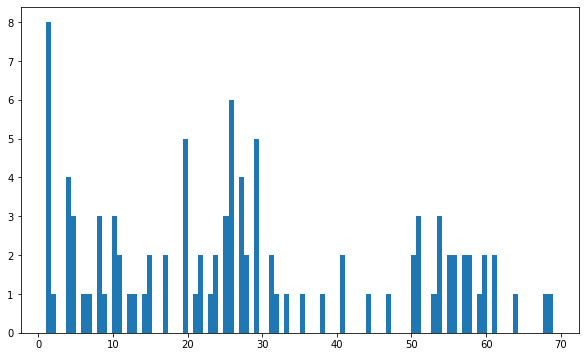

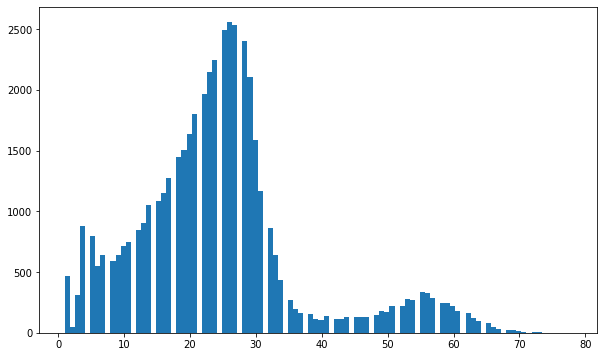

In [0]:
import spacy
from tqdm.notebook import tqdm  # progress bar

# YOUR CODE HERE
from time import sleep

import json

with open("harbour-space-text-mining-course/datasets/trump_twitter_archive/tweets.json") as f:
    tweets = json.load(f)

nlp_none = spacy.load("en", disable=["tagger", "parser", "ner"])

tweet_tokens = []
unique_tokens = set()
for tweet in tqdm(tweets[:100]):
  doc = nlp_none(tweet['text'])
  tweet_tokens.append(list(doc))  # doc is an annotated document with a lot of info
  unique_tokens.update(list(doc))

len_tokens = [len(tweet) for tweet in tweet_tokens]
avg_tokens = sum(len_tokens) / len(len_tokens)
print(f"Unique tokens across all tweets: {len(set(unique_tokens))}")
print(f"Average tokens per tweet: {avg_tokens}")

### alternate ###

tweet_len = []
uniq_tokens = set()

for tw in tqdm(tweets):
  doc = nlp_none(tw['text'])
  # print(type(doc))
  # print(type(doc[0]), doc[0])
  # print(type(doc[0].text), doc[0].text)
  tokens = [token.text for token in doc] 
  # print(type(tokens[:2]), tokens[:2])
  tweet_len.append(len(tokens))
  uniq_tokens |= set(tokens)  # uniq_tokens.update(tokens)

print(f"Unique tokens across all tweets: {len(uniq_tokens)}")
print(f"Average tokens per tweet: {sum(tweet_len) / len(tweet_len)}")

import matplotlib.pyplot as plt
# my soln:
plt.figure(figsize=(10, 6))
plt.hist(len_tokens, bins=100)
plt.show()

# sergey's soln
plt.figure(figsize=(10, 6))
plt.hist(tweet_len, bins=100)
plt.show()

# Apparently mine is not correct

## Exercise 2

Find 10 lemmas that have the largest number of **unique** forms.

For example, the text “Is is are are” contains _three_ distinct forms of the lemma “be”: “Is”, “is”, “are”.

**Hints**
- Disable `parser` and `ner` to speed up computations.
- Use `tqdm` to show progress bar.
- Debug on a small subset of tweets, then compute on the full dataset.
- Lemma is stored in `.lemma_` attribute of spaCy token, form is the token text in the attribute `.text`.

In [0]:
from collections import defaultdict
from tqdm.notebook import tqdm
from pprint import pprint

# YOUR CODE HERE
nlp_tagger = spacy.load("en", disable=["parser", "ner"])

# wrong solution as outputting count of top, where as to output only top tags
# token_lemma = []
# lemma_dict = defaultdict(int)
# for tweet in tqdm(tweets):
#   doc = nlp_tagger(tweet['text'])
#   for token in doc:
#     lemma = token.lemma_
#     lemma_hash = token.lemma
#     lemma_dict[lemma] += 1
#     token_lemma.append((token, lemma, lemma_hash))

In [0]:
### alternate by sergey ###
lemma_form = defaultdict(set)
for tweet in tqdm(tweets):
  for token in nlp_tagger(tweet["text"]):
    lemma_form[token.lemma_].add(token.text)

pprint(
    list(sorted(
        lemma_form,
        key=lambda l: len(lemma_form[l]),
        reverse=True
    ))[:10]
)


['-PRON-', 'be', 'go', 'have', 'do', 'love', 'get', 'close', 'pay', 'know']


In [0]:
# lemma_counter = Counter(lemma_dict)
# pprint(lemma_counter.most_common()[:5], compact=True)

[('-PRON-', 67483), ('.', 42035), ('be', 39475), ('the', 39015), (',', 32658)]


## Exercise 3

1. How many tweets contain named entities?
2. What are top-5 most popular entity labels?

**Hints**:
- Disable `parser` and `tagger` to speed up computations.
- Use `tqdm` to show progress bar.
- Debug on a small subset of tweets, then compute on the full dataset.

In [0]:
import spacy
from collections import Counter
from tqdm.notebook import tqdm
from pprint import pprint

# YOUR CODE HERE
nlp_ent = spacy.load("en") #, disable=["parser", "tagger"])

tw_with_ents = 0
label_count = Counter()
for tweet in tqdm(tweets[:1000]):
  doc = nlp_ent(tweet['text'])
  if doc.ents:
    tw_with_ents += 1
  for ent in doc.ents:
    label_count[ent.label_] += 1



In [0]:
print(tw_with_ents)
pprint(label_count.most_common(5))

777
[('ORG', 646), ('PERSON', 442), ('GPE', 295), ('DATE', 167), ('NORP', 164)]


<!--@slideshow slide-->
# "Word of a day"

**Problem statement**
- For each day, find the word which is "specific" for this day in Trump's tweets.
- It may be a name, a country, or some event.


<!--@slideshow fragment-->
**Definitions and notation**:
- *Term* (notation: $t$) is a "meaningful" piece of text (lemma in our case).
- *Document* (notation: $d$) is the collection of tweets created on a given day.
- $D$ is the set of all documents (not tweets!).

<!--@slideshow slide-->
The first attempt: find the most frequent term for each document.

In [0]:
#@slideshow fragment
# preprocess the data: create documents from tweets
from pprint import pprint
from dateutil.parser import parse as parse_datetime  # convert a string in any format to a datetime object
# preprocess the data: convert each tweet into tuple (date, lemmas_list)
import spacy
nlp = spacy.load("en", disable=["parser", "ner", "tagger"])
preprocessed_tweets = []
for tweet in tqdm(tweets):
    if tweet.get("is_retweet"):
        # ignore retweets
        continue
    tweet_date = parse_datetime(tweet["created_at"]).date()
    tweet_lemmas = [token.lemma_ for token in nlp(tweet["text"])]
    preprocessed_tweets.append((tweet_date, tweet_lemmas))

# this is how the preprocessed data looks like
pprint(preprocessed_tweets[100], compact=True)


(datetime.date(2020, 5, 1),
 ['Cryin', '’', 'Chuck', 'Schumer', 'be', 'on', 'a', 'late', 'night', 'show',
  'use', 'a', 'false', 'talk', 'point', 'over', '&', 'amp', ';', 'over',
  'again', '.', '“', 'We', 'do', 'not', 'have', 'enough', 'test', ',', '”',
  'he', 'would', 'repeat', ',', 'when', 'he', 'know', 'we', 'have', 'do', 'a',
  'great', 'job', 'on', 'Testing', ',', 'just', 'like', 'we', 'have', 'on',
  'Ventilators', 'and', 'everything', 'else', '.', 'He', 'lie', ',', 'give',
  'NY', 'SALT', '.', 'Run', 'AOC', '!'])


In [0]:
from collections import Counter, defaultdict

In [0]:
#@slideshow slide
# term count for each document
document_term_counter = defaultdict(Counter)
for tweet_date, tweet_lemmas in preprocessed_tweets:
    for lemma in tweet_lemmas:
        # tweet_date is the document
        # lemma is the term
        document_term_counter[tweet_date][lemma] += 1

In [0]:
#@slideshow fragment tags=remove_input
# visualize

documents = []
terms = []
weights = []

for d in sorted(document_term_counter):
    documents.append(d)
    # get the most frequent term and its count
    term, count = document_term_counter[d].most_common(1)[0]
    terms.append(term)
    weights.append(count)

from datetime import date
html = calendar_table(documents, terms, weights, from_datetime=date(2020, 3, 30))
display(HTML(html))

week,Mon,Tue,Wed,Thu,Fri,Sat,Sun
2020-03-30 - 2020-04-05,",",",",",",",",the,be,!
2020-04-06 - 2020-04-12,be,",",",",the,",",be,.
2020-04-13 - 2020-04-19,the,",",",",.,",",",",be
2020-04-20 - 2020-04-26,",",",",be,and,",",the,the
2020-04-27 - 2020-05-03,",",",",!,",",",",.,","
2020-05-04 - 2020-05-10,",",",",",",",",and,,


<!--@slideshow slide-->
- As expected, the most frequent terms overall are the most frequent in each document.
- The most frequent terms are not informative
- Does informativity depend on frequency?

In [0]:
# count all terms
term_counter = Counter()
for tweet_date, tweet_lemmas in preprocessed_tweets:
    for term in tweet_lemmas:
        term_counter[term] += 1

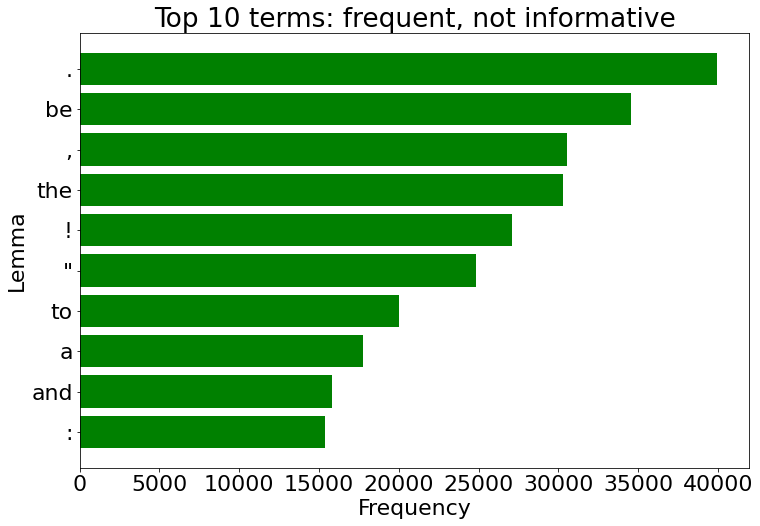

In [0]:
#@slideshow slide tags=remove_input   
visualize_term_counter(term_counter, 0, "Top 10 terms: frequent, not informative", use_ggplot=False)

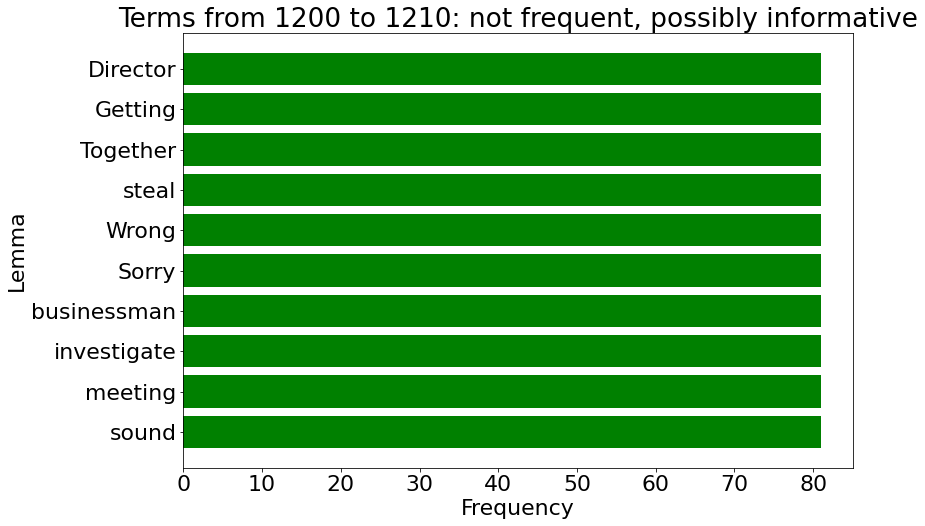

In [0]:
#@slideshow slide tags=remove_input
visualize_term_counter(term_counter, 1200, "Terms from 1200 to 1210: not frequent, possibly informative", use_ggplot=False)

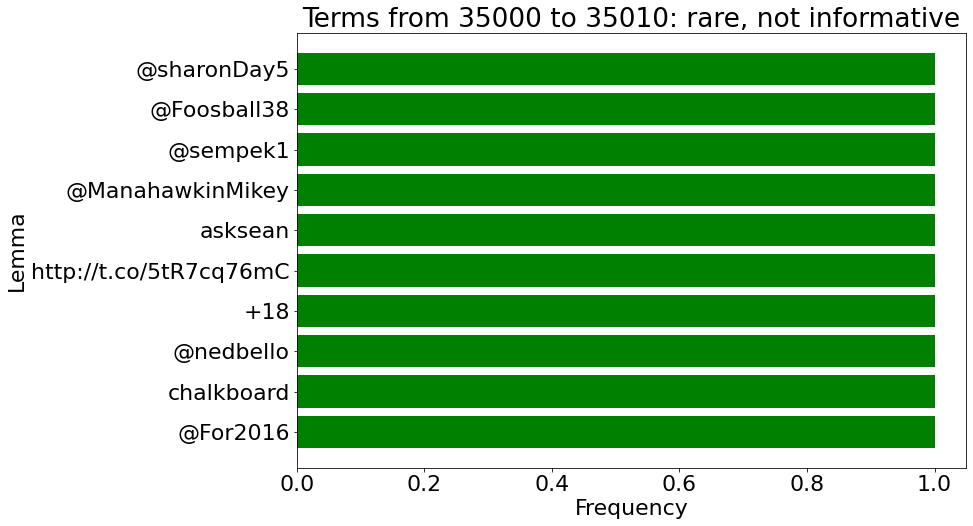

In [0]:
#@slideshow slide tags=remove_input
visualize_term_counter(term_counter, 35000, "Terms from 35000 to 35010: rare, not informative", use_ggplot=False)

<!--@slideshow slide-->
# TF-IDF

Try the following idea:
> The term $t$ is specific (or informative) for the document $d$ if it occurs relatively rarely in $D$ but occurs often in $d$.

<!--@slideshow fragment-->

The measure of "informativity" of term $t$ for document $d$ should satisfy two properties:
1. The higher the frequency of $t$ in $d$, the _higher_ the informativity.
2. The higher the frequency of $t$ in the collection $D$, the _lower_ the informativity.





<!--@slideshow fragment-->
It can be written as the product of two functions:
$$TFIDF(t, d, D) = TF(t, d) \cdot IDF(t, D)$$

<!--@slideshow slide-->
## Term frequency $TF(t, d)$

Term frequency is just the number of occurrences of the term $t$ in the document $d$.

<!--@slideshow slide-->
## Inverse document frequency $IDF(t, D)$

- In practice, the range of "informativity" is wide.
- Informative terms may occur in 1%, 0.1% or even 0.01% of all documents $D$.
- That's why $IDF(t, D)$ depends on $t$'s frequency in $D$ _logarithmically_.
> If $t_1$ is 10 times more frequent than $t_2$, then $IDF(t_1, D) - IDF(t_2, D) = \mathrm{const}$

<!--@slideshow slide-->
$IDF(t, D)$ is computed in 3 steps:
1. Compute the number of documents that contain $t$.
2. Divide it by the total number of documents.
  > The result is the probability to find term $t$ in a randomly chosen document.
3. Take the $\log$ of the _inverse_ quantity from the previous step.


<!--@slideshow fragment-->
Or, mathematically
$$
IDF(t, D) = \log\left(\dfrac{|D|}{|\{d \in D | t \in d\}|}\right)
$$
- $|D|$ is the total number of documents
- $|\{d \in D | t \in d\}|$ is the number of documents that contain $t$

<!--@slideshow slide-->
## TF-IDF example

Consider the collection $D$ containing 3 documents

1. $d_1$ = "If you tell the truth you don’t have to remember anything."
2. $d_2$ = "If you don’t read the newspaper, you’re uninformed. If you read the newspaper, you’re misinformed."
3. $d_3$ = "A lie can travel half way around the world while the truth is putting on its shoes."

Let us compute $TFIDF(\mathrm{''newspaper''}, d_2, D)$:
- $TF(\mathrm{''newspaper''}, d_2) = 2$
- $IDF(\mathrm{''newspaper''}, D) = \log\left(\dfrac{3}{1}\right) \approx 1.1$
- $TFIDF(\mathrm{''newspaper''}, d_2, D) \approx 2.2$

<!--@slideshow slide-->
## Colab qiuz 4
Compute $TFIDF(\mathrm{''If''}, d_1, D)$




In [0]:
enable_mathjax_in_cell()
quiz_tfidf()()

<!--@slideshow slide-->
## TF-IDF implementation

In [0]:
#@slideshow fragment
from collections import defaultdict, Counter
# 1. Compute IDF for all terms.
#    Remember that we've already computed term counts for all documents.
#    Document_term_counter[document][term] = term_count_in_document.

# For each term, compute the number of documents where the term occurs
term_counter = Counter()
for document in document_term_counter:
    for term in document_term_counter[document]:
        term_counter[term] += 1
# compute term IDFs from term counts
num_documents = len(document_term_counter)
from math import log
term_idf = {
    term: log(num_documents / term_count)
    for term, term_count in term_counter.items()
}

# 2. Compute TF-IDF for all terms and documents
document_term_tfidf = defaultdict(Counter)
for document in document_term_counter:
    word_tfidf = {}
    for term in document_term_counter[document]:
        tf = document_term_counter[document][term]
        idf = term_idf[term]
        document_term_tfidf[document][term] = tf * idf

In [0]:
# visualize
documents = []
terms = []
weights = []

for d in sorted(document_term_tfidf):
    documents.append(d)
    # get the most frequent term and its count
    term = max(document_term_tfidf[d], key=lambda t: document_term_tfidf[d][t])
    terms.append(term)
    weights.append(document_term_tfidf[d][term])

def print_tweets_by_date(tweets, d):
    from pprint import pprint
    for tweet in tweets:
        if tweet.get("is_retweet"):
            continue
        if parse_datetime(tweet["created_at"]).date() == d:
            pprint(tweet["text"])
            print("---")

<!--@slideshow slide-->
## Colab demo: insights from daily TF-IDF

In [0]:
# look at the period of Trump's impeachment
from datetime import date
html = calendar_table(
    documents,
    terms,
    weights,
    from_datetime=date(2019, 12, 1),
    to_datetime=date(2020, 2, 1),
)
display(HTML(html))

week,Mon,Tue,Wed,Thu,Fri,Sat,Sun
2019-11-25 - 2019-12-01,,,,,,,AIDS
2019-12-02 - 2019-12-08,Impeachment,https://t.co/KDVaYDKZLa,NATO,brother,Saudi,phone,evidence
2019-12-09 - 2019-12-15,https://t.co/1seRjQ11ru,FBI,ONE,https://t.co/powyhHM50y,Boris,irreparable,I.G.
2019-12-16 - 2019-12-22,....,Endorsement,ASSAULT,Nothing,religion,Mac,Majority
2019-12-23 - 2019-12-29,trial,Constitution,https://t.co/e7ZCOVe98F,homeless,Tribe,Nancy,Monsey
2019-12-30 - 2020-01-05,Coupled,Embassy,https://t.co/EVAEYD1AgV,sputter,argument,Iran,strike
2020-01-06 - 2020-01-12,continuation,@kbsalsaud,Missiles,%,@Varneyco,شما,ICIG
2020-01-13 - 2020-01-19,Existing,trial,party,https://t.co/jVr7qmYOvu,به,16.9,@paulkrugman
2020-01-20 - 2020-01-26,fairness,Roger,@Davos,Democrats,Cryin,Impeachment,Bryant
2020-01-27 - 2020-02-02,Bolton,three,Impeachment,Coronavirus,Witnesses,Greatest,


In [0]:
# the first time "impeachment" becomes "word of a day"
print_tweets_by_date(tweets, date(2019, 12, 2))

('Mini Mike Bloomberg has instructed his third rate news organization not to '
 'investigate him or any Democrat, but to go after President Trump, only. The '
 'Failing New York Times thinks that is O.K., because their hatred &amp; bias '
 'is so great they can’t even see straight. It’s not O.K.!')
---
('Just landed in the United Kingdom, heading to London for NATO meetings '
 'tomorrow. Prior to landing I read the Republicans Report on the Impeachment '
 'Hoax. Great job! Radical Left has NO CASE. Read the Transcripts. Shouldn’t '
 'even be allowed. Can we go to Supreme Court to stop?')
---
('The Fed should lower rates (there is almost no inflation) and loosen, making '
 'us competitive with other nations, and manufacturing will SOAR! Dollar is '
 'very strong relative to others.')
---
('Manufacturers are being held back by the strong Dollar, which is being '
 'propped up by the ridiculous policies of the Federal Reserve - Which has '
 'called interest rates and quantitative tightenin

In [0]:
# the second time "impeachment" becomes "word of a day"
print_tweets_by_date(tweets, date(2020, 1, 29))

('Nancy Pelosi wants Congress to take away authority Presidents use to stand '
 'up to other countries and defend AMERICANS. Stand with your Commander in '
 'Chiefs!')
---
('With Votes in the House tomorrow, Democrats want to make it harder for '
 'Presidents to defend America, and stand up to, as an example, Iran. Protect '
 'our GREAT COUNTRY!')
---
'GAME OVER! https://t.co/yvMa6bPqfy'
---
'https://t.co/aX5WIX8B0O'
---
('For the first time in American History, we have replaced a disastrous Trade '
 'Deal that REWARDED outsourcing with a truly FAIR and RECIPROCAL Trade Deal '
 'that will keep jobs, wealth and growth right here in AMERICA! '
 'https://t.co/bDe8IV9DyD')
---
('Thanks to our pro-worker, pro-American economic policies, unemployment is at '
 'the lowest level in more than 50 years. We have created over 7 MILLION new '
 'JOBS. More Americans are working today than EVER before. We have the hottest '
 'ECONOMY on earth! https://t.co/TRGKRF7xgQ')
---
('USMCA is a cutting edge s

In [0]:
# interestingly, Coronavirus becomes "word of a day" quite early
print_tweets_by_date(tweets, date(2020, 1, 30))

('Working closely with China and others on Coronavirus outbreak. Only 5 people '
 'in U.S., all in good recovery.')
---
'Leaving Michigan now, great visit, heading for Iowa. Big Rally!'
---
('BIGGEST TRADE DEAL EVER MADE, the USMCA, was signed yesterday and the Fake '
 'News Media barely mentioned it. They never thought it could be done. They '
 'have zero credibility!')
---
('Just landed in Michigan. Car companies, and many others, are building and '
 'expanding here. Great to see!')
---
('Happy birthday today to two of the very best in Congress—@RepMikeJohnson '
 '(age 48) and @RepLeeZeldin (age 40—big one!). Two Great American Patriots!!')
---
('Congressman @MichaelCBurgess has done a Great job representing the people of '
 'Texas. He continues to protect your very important Second Amendment. Mike is '
 'Strong on Crime and the Border, he Loves our Great Vets and Military. Mike '
 'has my Complete and Total Endorsement!')
---
('Congressman Brian @Babin4Congress of Texas has been a s

In [0]:
# look at the period of COVID-19 outbreak
from datetime import date
html = calendar_table(
    documents,
    terms,
    weights,
    from_datetime=date(2020, 3, 1),
    to_datetime=date(2020, 5, 1),
)
display(HTML(html))

week,Mon,Tue,Wed,Thu,Fri,Sat,Sun
2020-02-24 - 2020-03-01,,,,,,,Mini
2020-03-02 - 2020-03-08,Michelle,ease,KAG2020,CoronaVirus,PROMISES,@MariaLeeTN,Bernie
2020-03-09 - 2020-03-15,Steven,car,CoronaVirus,KEEPING,Swine,COVID-19,conjunction
2020-03-16 - 2020-03-22,tele,https://t.co/6gD7l9Po59,Virus,THANK,Businesses,https://t.co/hOFQEf1hUM,supply
2020-03-23 - 2020-03-29,WE,mask,ventilator,Teleconference,Ventilators,SOURCES,Lamestream
2020-03-30 - 2020-04-05,https://t.co/Zt3mEb1h99,car,restaurant,hospital,@USNationalGuard,@BankofAmerica,6:45
2020-04-06 - 2020-04-12,Convention,Daniel,Bernie,Boris,251,source,philanthropist
2020-04-13 - 2020-04-19,Ban,GET,Steinbrenner,https://t.co/lmb1H6I6en,W.H.O.,Lamestream,Ventilators
2020-04-20 - 2020-04-26,Testing,Tom,Cindy,Complete,Ventilators,Ventilators,Noble
2020-04-27 - 2020-05-03,state,https://t.co/shcVSYZmuY,Testing,Flynn,Tom,,


<!--@slideshow slide-->
## Remarks on TF-IDF
1. The idea of TF-IDF is very general and can be applied outside of Text Mining domain.
  > For example, a sequence of websites visited by a user can be treated as a "document", and each individual website is a "term".

  > It doesn't tell you much if the user visits [facebook.com](https://colab.research.google.com/drive/1HBWC4XPaYmnyF8nF6OpAKSy1hLasZxuV?usp=sharing) 10 times a day.
  
  > But 10 visits of [stackoverflow.com](https://stackoverflow.com) per day may tell you something.

2. You can look at the probabilistic interpretation of TF-IDF in the **[OPTIONAL]** section.

# TF-IDF in sklearn

<!--@slideshow slide-->
# Transform texts to vectors

In practice, it's convenient to have the finite number of terms.
> We can use, say, 10000 the most common words, ignoring all the other words.

In [0]:
#@slideshow slide tags=remove_input
n_frequent_terms = 10000
most_common_terms = set([x[0] for x in term_counter.most_common()][:n_frequent_terms])
import random
random.seed(42)

tweets_data = []
for random_tweet in random.choices(preprocessed_tweets, k=10):
    original_tweet = " ".join(random_tweet[1])
    masked_tweet = []
    for t in random_tweet[1]:
        if t in most_common_terms:
            masked_tweet.append(t)
        else:
            masked_tweet.append("<UNK>")
    tweet_with_rare_words_ignored = " ".join(masked_tweet)
    tweets_data.append((original_tweet, tweet_with_rare_words_ignored))

from IPython.display import display, HTML
display(HTML(tabulate(
    tweets_data,
    headers=(
        "Original tweets ({} terms)".format(len(term_counter)),
        "Keep {} frequent terms".format(n_frequent_terms)
    ),
    tablefmt="html"
)))

Original tweets (56238 terms),Keep 10000 frequent terms
""" @Aaron_Yay : Trump be my new idol . His pastor be Norman Vincent Peale ? ! # NewThoughtPioneer - can not wait to read the Art of the Deal .",""" <UNK> : Trump be my new idol . His pastor be Norman Vincent Peale ? ! # <UNK> - can not wait to read the Art of the Deal ."
.... THE UNITED STATES IS OPEN FOR BUSINESS !,.... THE UNITED STATES IS OPEN FOR BUSINESS !
"May God be w/ the people of Sutherland Springs , Texas . The FBI & amp ; law enforcement be on the scene . I be monitor the situation from Japan .","May God be w/ the people of <UNK> Springs , Texas . The FBI & amp ; law enforcement be on the scene . I be monitor the situation from Japan ."
CNN be work frantically to find their “ source . ” Look hard because it do not exist . Whatever be leave of CNN ’s credibility be now go !,CNN be work <UNK> to find their “ source . ” Look hard because it do not exist . Whatever be leave of CNN ’s credibility be now go !
Obama administration be kill American industrial renaissance by stop drill and fracking . Terrible for economy .,Obama administration be kill American industrial <UNK> by stop drill and fracking . Terrible for economy .
""" @Noe Donald Trump : "" # RaffaeleSollecito be unfairly convict . He do not kill anyone . The Italian government should be ashamed . ” # innocent """,""" <UNK> Donald Trump : "" # <UNK> be unfairly convict . He do not kill anyone . The Italian government should be ashamed . ” # innocent """
@henriwts @BaetensGert Yes .,<UNK> <UNK> Yes .
"So if the so - call “ Whistleblower ” have all 2 hand information , and almost everything he have say about my “ perfect ” call with the Ukrainian President be wrong ( much to the embarrassment of Pelosi & amp ; Schiff ) , why be not we entitle to interview & amp ; learn everything about ....","So if the so - call “ Whistleblower ” have all 2 hand information , and almost everything he have say about my “ perfect ” call with the Ukrainian President be wrong ( much to the embarrassment of Pelosi & amp ; Schiff ) , why be not we entitle to interview & amp ; learn everything about ...."
""" @curtiscraven76 : @CNN @realDonaldTrump keep up your good work Mr trump cause u have my vote """,""" <UNK> : @CNN @realDonaldTrump keep up your good work Mr trump cause u have my vote """
"Congratulations to the Kansas City Chiefs on a great game , and a fantastic comeback , under immense pressure . You represent the Great State of Kansas and , in fact , the entire USA , so very good . Our Country be PROUD OF YOU !","Congratulations to the Kansas City Chiefs on a great game , and a fantastic comeback , under <UNK> pressure . You represent the Great State of Kansas and , in fact , the entire USA , so very good . Our Country be PROUD OF YOU !"


<!--@slideshow slide-->
Our observations so far:
1. For each term $t$ in each document $d \in D$, we can compute $TFIDF(t, d, D)$.
2. We can have the finite number of terms.

Therefore, we can represent each document with the fixed set of TFIDFs.

<!--@slideshow fragment-->
In other words, we can convert a document into a **vector**.

<!--@slideshow fragment-->
But why?
- To compute the distance between two documents (for example, to find similar documents).
- Vectors are inputs for machine learning algorithms.

<!--@slideshow slide-->
## Colab quiz 5
The cosine distance between vectors $\mathbb{v_1}$ and $\mathbb{v_2}$ is computed as
$$
d(\mathbb{v_1}, \mathbb{v_2}) = 1 - \frac{1}{2}\cos(\textrm{angle between }\mathbb{v_1}\textrm{ and }\mathbb{v_2}) = 
$$
$$ =1 - \frac{1}{2}\left(\dfrac{\mathbb{v_1}}{||\mathbb{v_1}||}\right) \cdot \left(\dfrac{\mathbb{v_2}}{||\mathbb{v_2}||}\right)
$$

where $||\mathbb{v}|| = \sqrt{\sum_i v_i^2}$ is the Euclidean norm of $\mathbb{v}$, and $\mathbb{v} \cdot \mathbb{w} = \sum_i v_i w_i$ is the dot product of $\mathbb{v}$ and $\mathbb{w}$.

So the algorithm to compute $d(\mathbb{v_1}, \mathbb{v_2})$ is:
1. Normalize the vectors: $\mathbb{\tilde v_1} = \dfrac{\mathbb{v_1}}{||\mathbb{v_1}||}$,  $\mathbb{\tilde v_2} = \dfrac{\mathbb{v_2}}{||\mathbb{v_2}||}$
2. Compute the dot product between the normalized vectors $\mathbb{\tilde v_1} \cdot \mathbb{\tilde v_2}$
3. Compute the distance: $d(\mathbb{v_1},~\mathbb{v_2}) = 1 - \mathbb{\tilde v_1}~\cdot~\mathbb{\tilde v_2}$

In [0]:
enable_mathjax_in_cell()
quiz_vector_distance()()

<!--@slideshow slide-->
scikit-learn implements so-called "vectorizers" that convert texts into vectors.

In [0]:
#@slideshow fragment
# TfidfVectorizer converts texts into vectors
from sklearn.feature_extraction.text import TfidfVectorizer

# the texts we will vectorize
data = [
  "One, two, three.",
  "Two, three.",
  "Three."
]

# Tfidf vectorizer has the "smooth" version of IDF
# Here is the difference:
#   idf = log(n_documents / count) + 1
#   smooth_idf = log((n_documents + 1) / (count + 1)) + 1

# Note that instead of 
#   idf = log(n_documents / count)
# TfidfVectorizer computes
#   idf = log(n_documents / count) + 1
# It helps to distinguish 2 cases:
#   1. TF-IDF(t, d, D) = 0 because the term t is absent in the document d
#   2. TF-IDF(t, d, D) = 0 because the term t is present in each document in the collection D
vectorizer = TfidfVectorizer(smooth_idf=False)

# to compute TF-IDFs, use the method `.fit()`
vectorizer.fit(data)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=False, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [0]:
#@slideshow slide
# vectorizer.vocabulary_ contains word -> index mapping
print("vectorizer.vocabulary_:", vectorizer.vocabulary_)
# vectorizer.idf_ contains the idf value for each index
print("vectorizer.idf_:", vectorizer.idf_)

# let's check that TfidfVectorizer uses the formula
#   idf = log(n_documents / count) + 1
# to do so, we restore word count from idf
vectorizer_internals = []
for word, idx in vectorizer.vocabulary_.items():
  idf = vectorizer.idf_[idx]
  n_documents = len(data)
  count = n_documents / exp(idf - 1)
  vectorizer_internals.append([word, idf, count])

print(tabulate(vectorizer_internals, headers=["word", "idf", "count"]))

vectorizer.vocabulary_: {'one': 0, 'two': 2, 'three': 1}
vectorizer.idf_: [2.09861229 1.         1.40546511]
word        idf    count
------  -------  -------
one     2.09861        1
two     1.40547        2
three   1              3


In [0]:
#@slideshow slide
# The trained vectorizer can be applied on new data
new_data = [
    "Two, three, four",
    "Five",
]
pprint(vectorizer.transform(new_data).todense())

matrix([[0.        , 0.57973867, 0.81480247],
        [0.        , 0.        , 0.        ]])


<!--@slideshow fragment-->
The `.transform()` method converts the input text array into matrix where:
- $i$-th row corresponds to the $i$-th input text
- $j$-th column corresponds to some term $t_j$ *from the training set*
  > The mapping $t_j \rightarrow j$ is stored in the `.vocabulary_` attribute.

Note that:
1. New words ("four", "five") are ignored.
1. Non-zero vectors are normalized (have length 1).

<!--@slideshow slide-->
## Colab quiz 6

In [0]:
quiz_vectorizer_shape()()

<!--@slideshow slide-->
By default, `TfidfVectorizer` performs simple tokenization: lowercasing, split by punctuation.

In [0]:
from pprint import pprint

In [0]:
#@slideshow fragment
text = tweets[99]["text"]
print(text)
vectorizer = TfidfVectorizer().fit([text])
pprint(vectorizer.vocabulary_)

Thank you! https://t.co/s3aLt9qTVZ
{'co': 0, 'https': 1, 's3alt9qtvz': 2, 'thank': 3, 'you': 4}


<!--@slideshow fragment-->
But the tokenizer can be redefined:

In [0]:
#@slideshow fragment
nlp = spacy.load("en", disable=["parser", "ner", "tagger"])

def spacy_tokenizer(text):
    return [t.lemma_ for t in nlp(text)]

text = tweets[99]["text"]
print(text)
vectorizer_spacy = TfidfVectorizer(tokenizer=spacy_tokenizer).fit([text])
pprint(vectorizer_spacy.vocabulary_)

Thank you! https://t.co/s3aLt9qTVZ
{'!': 0, 'https://t.co/s3alt9qtvz': 1, 'thank': 2, 'you': 3}


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


<!--@slideshow slide-->
# Text similarity with TF-IDF: Quora Question Pairs

Now we will use TF-IDF vectors to find duplicates in Quora questions.

In [0]:
#@slideshow fragment
import pandas as pd

df = pd.read_csv("harbour-space-text-mining-course/datasets/quora_question_pairs/train.csv")
print(f"Total samples: {df.shape[0]}")
# select a subset of rows to speed up the demonstration
df = df.head(20000)
# `is_duplicate` shows whether `question1` and `question2` are duplicates
df[["question1", "question2", "is_duplicate"]].head(10)

Total samples: 404290


,question1,question2,is_duplicate
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
5,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
6,Should I buy tiago?,What keeps childern active and far from phone ...,0
7,How can I be a good geologist?,What should I do to be a great geologist?,1
8,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0
9,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0


In [0]:
#@slideshow slide
import numpy as np
from sklearn.model_selection import train_test_split

# split the data into two parts
# we will train TfidfVectorizer on the first (train) part and apply it on the second (test) part
df_train, df_test = train_test_split(df.fillna("."), test_size=0.5, shuffle=True, random_state=0)

# we use spacy_tokenizer, but we could use the default one
quora_vectorizer = TfidfVectorizer(tokenizer=spacy_tokenizer)

# stack two columns: question1 first, question2 second
questions = np.hstack([df_train.question1.values, df_train.question2.values])
quora_vectorizer.fit(questions)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=<function spacy_tokenizer at 0x7f5fb4915ea0>,
                use_idf=True, vocabulary=None)

In [0]:
#@slideshow slide
# extract TF-IDF vectors from the test data
question_1_vectors = quora_vectorizer.transform(df_test.question1)
question_2_vectors = quora_vectorizer.transform(df_test.question2)

In [0]:
#@slideshow fragment
from sklearn.metrics import roc_auc_score

# compute distances between TF-IDF vectors
# iterate over pairs using `zip()` generator
# vectors are normalized, so the similarity = 1 - distance = dot product
tf_idf_similarity = [
    # v1, v2 are sparse matrices: convert their dot product into a dense matrix and then to a scalar
    np.dot(v1, v2.T).todense().item()  
    for v1, v2 in zip(question_1_vectors, question_2_vectors)
]
# evaluate ROC AUC score:
#   - ROC AUC = 1 for perfect ranking
#   - ROC AUC = 0.5 for random ranking
print("ROC AUC:", roc_auc_score(df_test.is_duplicate, tf_idf_similarity))

ROC AUC: 0.7190145081862447


<!--@slideshow slide-->
# Other sklearn vectorizers

There are other vectorizers that convert texts into vectors. All of them implement the same `fit/transform` interface.
1. `CountVectorizer`. Constructs the vector of term frequencies instead of TF-IDFs
1. `HashingVectorizer`. Performs so-called "one-hot encoding". Converts the document into binary vector: 1 if the term occurs in the document and 0 otherwise.

> Hashing vectorizer doesn't store the vocabulary - it  constructs vectors "on the fly" using hash function.

In [0]:
#@slideshow slide
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
data = [
  "one",
  "one two",
  "one two three",
]

tfidf_vectorizer = TfidfVectorizer().fit(data)
count_vectorizer = CountVectorizer().fit(data)
hashing_vectorizer = HashingVectorizer().fit(data)

new_data = [
    "one two two four",
    "five",
]
tfidf_transformed = tfidf_vectorizer.transform(new_data).todense()
count_transformed = count_vectorizer.transform(new_data).todense()
hashing_transformed = hashing_vectorizer.transform(new_data).todense()
print("TfidfVectorizer\n", tfidf_transformed)
print("CountVectorizer\n", count_transformed)
print("HashingVectorizer shape:", hashing_transformed.shape)

TfidfVectorizer
 [[0.361965   0.         0.93219169]
 [0.         0.         0.        ]]
CountVectorizer
 [[1 0 2]
 [0 0 0]]
HashingVectorizer shape: (2, 1048576)


<!--@slideshow slide-->
# Coding session 2: `sklearn`

## Exercise 1
Compare `TfidfVectorizer` and `CountVectorizer` on the Quora Question Pairs dataset. Which one gives higher ROC AUC?

**Hints**:
- You can use the same split into train and test.

In [0]:
# YOUR CODE HERE
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer


df_train, df_test = train_test_split(df.fillna("."), test_size=0.5, shuffle=True, random_state=0)
train_questions = np.hstack([df_train.question1.values, df_train.question2.values])

tfidf_vectorizer = TfidfVectorizer(tokenizer=spacy_tokenizer)
count_vectorizer = CountVectorizer(tokenizer=spacy_tokenizer)
tfidf_vectorizer.fit(train_questions)
count_vectorizer.fit(train_questions)

tfidf_q1_vectors = tfidf_vectorizer.transform(df_test.question1)
tfidf_q2_vectors = tfidf_vectorizer.transform(df_test.question2)
count_q1_vectors = count_vectorizer.transform(df_test.question1)
count_q2_vectors = count_vectorizer.transform(df_test.question2)

tfidf_similarity = [
    np.dot(v1, v2.T).todense().item()  
    for v1, v2 in zip(tfidf_q1_vectors, tfidf_q2_vectors)
]
count_similarity = [
    np.dot(v1, v2.T).todense().item()  
    for v1, v2 in zip(count_q1_vectors, count_q2_vectors)
]

print("TFIDF Vectorizer ROC AUC:", roc_auc_score(df_test.is_duplicate, tfidf_similarity))
print("COUNT Vectorizer ROC AUC:", roc_auc_score(df_test.is_duplicate, count_similarity))

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


TFIDF Vectorizer ROC AUC: 0.7190145081862447
COUNT Vectorizer ROC AUC: 0.5911961529283892


## Exercise 2

Compare the default tokenizer in `TfIdfVectorizer` and spaCy tokenizer. Which one gives higher ROC AUC?

**Hints**:
- You can use the same split into train and test.

In [0]:
# YOUR CODE HERE
tfidf_default_tokenizer = TfidfVectorizer()
tfidf_spacy_tokenizer = TfidfVectorizer(tokenizer=spacy_tokenizer)

tfidf_default_tokenizer.fit(train_questions)
tfidf_spacy_tokenizer.fit(train_questions)

default_q1_vectors = tfidf_default_tokenizer.transform(df_test.question1)
default_q2_vectors = tfidf_default_tokenizer.transform(df_test.question2)
spacy_q1_vectors = tfidf_spacy_tokenizer.transform(df_test.question1)
spacy_q2_vectors = tfidf_spacy_tokenizer.transform(df_test.question2)

tfidf_default_similarity = [
    np.dot(v1, v2.T).todense().item()  
    for v1, v2 in zip(default_q1_vectors, default_q2_vectors)
]
tfidf_spacy_similarity = [
    np.dot(v1, v2.T).todense().item()  
    for v1, v2 in zip(spacy_q1_vectors, spacy_q2_vectors)
]

print("TFIDF Default Tokenizer ROC AUC:", roc_auc_score(df_test.is_duplicate, tfidf_default_similarity))
print("TFIDF Spacy Tokenizer ROC AUC:", roc_auc_score(df_test.is_duplicate, tfidf_spacy_similarity))

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


TFIDF Default Tokenizer ROC AUC: 0.7151965644376397
TFIDF Spacy Tokenizer ROC AUC: 0.7190145081862447


## Exercise 3

`TfIdfVectorizer` has the parameter `ngram_range`. Set it to `(1, 2)` and compare with the default one. Which one gives higher ROC AUC?

**Hints**:
- You can use the same split into train and test.
- Use the default tokenizer, not the spaCy tokenizer.
- `ngram_range=(1, 2)` means that terms are not only words but also subsequent word pairs (so-called *bigrams*). We will cover it in more details in the next lecture.

In [0]:
# YOUR CODE HERE
ngram_default_tokenizer = TfidfVectorizer()
ngram_12_tokenizer = TfidfVectorizer(ngram_range=(1, 2))

ngram_default_tokenizer.fit(train_questions)
ngram_12_tokenizer.fit(train_questions)

default_q1_vectors = ngram_default_tokenizer.transform(df_test.question1)
default_q2_vectors = ngram_default_tokenizer.transform(df_test.question2)
ngram_q1_vectors = ngram_12_tokenizer.transform(df_test.question1)
ngram_q2_vectors = ngram_12_tokenizer.transform(df_test.question2)

ngram_default_similarity = [
    np.dot(v1, v2.T).todense().item()  
    for v1, v2 in zip(default_q1_vectors, default_q2_vectors)
]
ngram_12_similarity = [
    np.dot(v1, v2.T).todense().item()  
    for v1, v2 in zip(ngram_q1_vectors, ngram_q2_vectors)
]

print("TFIDF Default Ngram ROC AUC:", roc_auc_score(df_test.is_duplicate, ngram_default_similarity))
print("TFIDF Ngram_Range=(1, 2) ROC AUC:", roc_auc_score(df_test.is_duplicate, ngram_12_similarity))

TFIDF Default Ngram ROC AUC: 0.7151965644376397
TFIDF Ngram_Range=(1, 2) ROC AUC: 0.6801230491498611


## Exercise 4

`TfIdfVectorizer` has the parameter `stop_words`. Set it to `"english"` and compare with the default one. Which one gives higher ROC AUC?

**Hints**:
- You can use the same split into train and test.
- Use the default tokenizer, not the spaCy tokenizer.
- `stop_words="english"` means that the most frequent non-informative words are removed from the input data.

In [0]:
# YOUR CODE HERE
# YOUR CODE HERE
stopwords_default_tokenizer = TfidfVectorizer()
stopwords_english_tokenizer = TfidfVectorizer(stop_words="english")

stopwords_default_tokenizer.fit(train_questions)
stopwords_english_tokenizer.fit(train_questions)

default_q1_vectors = stopwords_default_tokenizer.transform(df_test.question1)
default_q2_vectors = stopwords_default_tokenizer.transform(df_test.question2)
english_q1_vectors = stopwords_english_tokenizer.transform(df_test.question1)
english_q2_vectors = stopwords_english_tokenizer.transform(df_test.question2)

stopwords_default_similarity = [
    np.dot(v1, v2.T).todense().item()  
    for v1, v2 in zip(default_q1_vectors, default_q2_vectors)
]
stopwords_english_similarity = [
    np.dot(v1, v2.T).todense().item()  
    for v1, v2 in zip(english_q1_vectors, english_q2_vectors)
]

print("TFIDF Stopwords=Default ROC AUC:", roc_auc_score(df_test.is_duplicate, stopwords_default_similarity))
print("TFIDF Stopwords=English ROC AUC:", roc_auc_score(df_test.is_duplicate, stopwords_english_similarity))

TFIDF Stopwords=Default ROC AUC: 0.7151965644376397
TFIDF Stopwords=English ROC AUC: 0.7136266892114091


<!--@slideshow slide-->
# Lecture summary
1. `spacy`: Python library for text analysis
  - tokenization
  - lemmatization
  - named entity recognition
1. TF-IDF: measure of the word informativity in the documents
  - The product of term frequency (TF) and inverse document frequency (IDF)
1. `TfidfVectorizer` in `sklearn`
  - `fit()`, `transform()`
1. TF-IDF vectors for text similarity
  - Quora Question Pairs dataset

<!--@slideshow slide-->
# Recommended resources
- [📖 Overview of Colaboratory Features](https://colab.research.google.com/notebooks/basic_features_overview.ipynb)
- [📖 Natural Language Processing with Python, chapter 3
](http://www.nltk.org/book/ch03.html)
- [📖 Advanced NLP with spaCy, chapter 1](https://course.spacy.io/)
- [📖 Lemma (morphology)](https://en.wikipedia.org/wiki/Lemma_(morphology))
- [📖 Language Processing Pipelines with spaCy](https://spacy.io/usage/processing-pipelines)
- [📖 Named Entity Recognition 101 with spaCy](https://spacy.io/usage/linguistic-features#named-entities)
- [📖 TfidfVectorizer documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)
- [📖 Quora Question Pairs dataset](https://www.kaggle.com/c/quora-question-pairs/overview)

<!--@slideshow slide-->
# [OPTIONAL] Probabilistic interpretation of TF-IDF

Given the collection of documents $D$, for each $d \in D$ we want to figure out which terms are the most specific for the document.

Let the number of terms is finite: $T$ distinct terms.

Let $p_t$ is the probability to find the term $t$ in a random document from $D$, and $f_t$ is the frequency of term $t$ in the document $d$ ($f_t$ may be 0).

Then the product $\prod_{t=1}^{T} p_i^{f_t}$ gives the probability that the document $d$ is generated randomly.

Thus, the inverse quality $L_d = \prod_{t=1}^{T} p_t^{-f_t}$ shows "non-randomness" of the document $d$

Take the $\log$:
$$
\log L_d = \sum_{t=1}^{T}f_t\log\left(\frac{1}{p_t}\right)
$$
The higher the $t$-th summand, the more the term $t$ makes the document "non-random".

Note that $t_i\log\left(\frac{1}{p_t}\right) = TFIDF(t, d)$.